In [1]:
import pickle as pkl
path = './results_deepsvg_format/'
file = open(path+'No_Curve_embeddingdebug/true_by_name.pkl', 'rb')
true_by_name = pkl.load(file)
file.close()
file = open(path+'No_Curve_embeddingdebug/pred_by_name.pkl', 'rb')
pred_by_name = pkl.load(file)
file.close()

In [2]:
import os
os.chdir("../deepsvg_own_data")
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *
from deepsvg.svglib.geom import Bbox

In [3]:
from deepsvg.gui.utils import preprocess_svg_path

In [4]:
true_path = SVGPath.from_tensor(torch.tensor(pred_by_name['BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B']))
svg = SVG([true_path]).normalize()

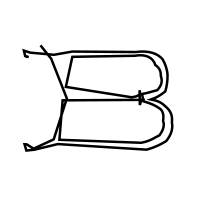

In [5]:
svg.draw()


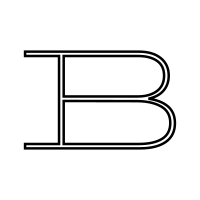

In [6]:
true_path = SVGPath.from_tensor(torch.tensor(true_by_name['BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B']))
svg = SVG([true_path]).normalize()
svg.draw()

In [26]:
SVG([true_path])[0].path

SVGPath(M[P(0.0, 0.0), P(3.27028751373291, 6.721236705780029)] L[P(3.27028751373291, 6.721236705780029), P(3.007493019104004, 6.721236705780029)] L[P(3.007493019104004, 6.721236705780029), P(3.0074949264526367, 6.458991527557373)] L[P(3.0074949264526367, 6.458991527557373), P(3.007495880126953, 6.1967453956604)] L[P(3.007495880126953, 6.1967453956604), P(3.270279884338379, 6.1967453956604)] L[P(3.270279884338379, 6.1967453956604), P(7.363696575164795, 6.1967453956604)] L[P(7.363696575164795, 6.1967453956604), P(7.642555236816406, 6.1967453956604)] L[P(7.642555236816406, 6.1967453956604), P(16.644298553466797, 6.1967453956604)] C[P(16.644298553466797, 6.1967453956604), P(17.77223777770996, 6.1967453956604), P(18.65485191345215, 6.45617151260376), P(19.292137145996094, 6.975024223327637)] C[P(19.292137145996094, 6.975024223327637), P(19.929424285888672, 7.493876934051514), P(20.24806785583496, 8.193199157714844), P(20.24806785583496, 9.072993278503418)] C[P(20.24806785583496, 9.072993278

In [7]:
from chamferdist import ChamferDistance as ChamferDistance
chamferDist = ChamferDistance()
count = 0
loss_paths = []
for k in list(true_by_name.keys()):
    #print(k)
    try:
        true_path = SVGPath.from_tensor(torch.tensor(true_by_name[k]))
    
        pred_path = SVGPath.from_tensor(torch.tensor(pred_by_name[k]))
    except:
        continue

    for i in range(min(len(true_path),len(pred_path))):
        t = torch.tensor(true_path[i].sample_points()).unsqueeze(0).float()
        p = torch.tensor(pred_path[i].sample_points()).unsqueeze(0).float()
        dist_bidirectional = chamferDist(t,p, bidirectional=True)
        loss = dist_bidirectional.detach().cpu().item()
        
        #loss = (torch.mean(dist1)) + (torch.mean(dist2))
        loss_paths.append(loss)
        #torch.cuda.synchronize()
    # if count <10:
    #     count+=1
    # else:
    #     break
    
    
    

In [8]:
np.array(loss_paths).mean()

57.55768515156405

In [13]:
loss_paths = np.array(loss_paths)
loss_paths[loss_paths<100].mean()

17.403856806459512

In [8]:
list(pred_by_name.keys())[:10]

['Barlow-Thin_076_L_566_1000-21-L',
 'Poly-Italic_081_Q_671_1000-26-Q',
 'Syne[wght]_110_n_554_1000-49-n',
 'BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B',
 'EkMukta-Bold_056_eight_520_1000-8-8',
 'DoHyeon-Regular_048_zero_550_1000-0-0',
 'Teko-Bold_119_w_679_1000-58-w',
 'Suwannaphum-Thin_116_t_719_2048-55-t',
 'AsapVFBeta_107_k_521_1000-46-k',
 'VesperLibre-Regular_083_S_1060_2048-28-S']

In [10]:
pred_by_name['Barlow-Thin_076_L_566_1000-21-L']

array([[ 0.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  0.       ,  0.       , -0.       , -0.       ,
        -0.       , -0.       ,  6.7201138,  3.3940554],
       [ 1.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  6.9470663,  3.6058517,  0.       ,  0.       ,
         0.       ,  0.       ,  7.01056  ,  3.4711063],
       [ 2.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  6.8396215,  3.420426 ,  6.862522 ,  3.279752 ,
         6.9442196,  3.2212684,  6.988139 ,  3.1680684],
       [ 2.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  6.837188 ,  3.1737132,  6.922393 ,  3.100187 ,
         7.0170217,  3.0351124,  7.0582666,  2.9928715],
       [ 1.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       ,  7.033644 ,  2.932614 ,  0.       ,  0.       ,
         0.       ,  0.       ,  7.248349 ,  3.0170197],
       [ 1.       , -1.       , -1.